In [1]:
### Week 3 Assignment 
## Programmer's name: Xander Lee
## Los Angeles County data containing info on educational level and Service Planning Areas (SPAs)
## will be pulled and ran through several commands to conduct census data exploration in order to 
## produce bar charts and maps.

In [2]:
#importing pandas
import pandas as pd
import geopandas as gpd

In [3]:
#read data file
df = pd.read_csv('data/R13563591_SL140.csv')

In [4]:
#look at the shape
df.shape

(2498, 64)

In [9]:
#quick inspection
df = pd.read_csv(
    'data/R13563591_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_GEOCOMP': str,
    
    }
)

In [10]:
# look at the data types, verbose = True shows us all the counts
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   object 
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   object 
 9   Geo_COUNTY         2498 non-null   object 
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [11]:
df.sample()

<bound method NDFrame.sample of          Geo_FIPS                                          Geo_QName  \
0     06037101110  Census Tract 1011.10, Los Angeles County, Cali...   
1     06037101122  Census Tract 1011.22, Los Angeles County, Cali...   
2     06037101220  Census Tract 1012.20, Los Angeles County, Cali...   
3     06037101221  Census Tract 1012.21, Los Angeles County, Cali...   
4     06037101222  Census Tract 1012.22, Los Angeles County, Cali...   
...           ...                                                ...   
2493  06037980038  Census Tract 9800.38, Los Angeles County, Cali...   
2494  06037980039  Census Tract 9800.39, Los Angeles County, Cali...   
2495  06037990100  Census Tract 9901, Los Angeles County, California   
2496  06037990200  Census Tract 9902, Los Angeles County, California   
2497  06037990300  Census Tract 9903, Los Angeles County, California   

     Geo_STUSAB  Geo_SUMLEV Geo_GEOCOMP  Geo_US  Geo_REGION  Geo_DIVISION  \
0            ca         14

In [ ]:
#frustratingly, i cannot get this to display as a neat table. at least I have leading zeros displaying correctly. 

In [13]:
#calculate the average percentage of residents aged 16 above who are transit reliant across all census tracts
df['PCT_SE_A09005_003'].mean()

5.243585592877378

In [17]:
#sort the data based on proportion of residents who are transit reliant, showing the most transit reliant areas first
df_sorted = df.sort_values(by='PCT_SE_A09005_003', ascending = False)

In [20]:
#display the 10 most transit-reliant CTs in LA county
df_sorted[['PCT_SE_A09005_003', 'Geo_FIPS']].head(10)

,PCT_SE_A09005_003,Geo_FIPS
622,57.83,06037208903
632,57.30,06037209402
590,51.77,06037206303
631,46.05,06037209401
589,45.35,06037206302
633,44.94,06037209403
621,44.20,06037208902
588,43.93,06037206301
618,43.82,06037208720
623,43.75,06037208904


<Axes: title={'center': '10 Most Transit-reliant Census Tracts in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)', ylabel='proportion of residents reliant on public transit'>

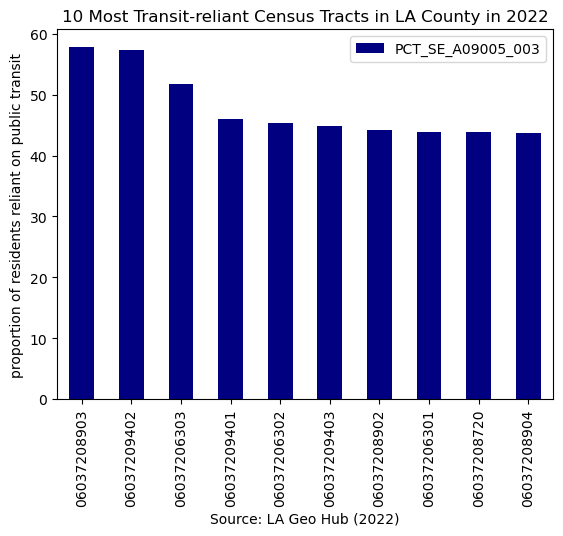

In [23]:
# I want to display a bar chart that shows the 10 most transit reliant census tracts in LA County.
df_sorted.head(10).plot.bar(x='Geo_FIPS',
                             y='PCT_SE_A09005_003',
                             title='10 Most Transit-reliant Census Tracts in LA County in 2022',
                             color='navy',
                            ylabel='proportion of residents reliant on public transit',
                            xlabel='Source: LA Geo Hub (2022)')

In [28]:
import geopandas as gpd

In [34]:
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

DriverError: data/Census_Tracts_2020.geojson: No such file or directory

In [ ]:
#Drats, even though Centus_Tracts_2020.geojson is uploaded in the data file of this directory, python is refusing to read it. 